# Data Analysis on Deepfake and Misinformation Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [ ]:
df = pd.read_csv("dataset.csv")
df.info()
# 14 Columns and 1100 Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1100 non-null   int64  
 1   Date                       1100 non-null   object 
 2   Time                       1100 non-null   object 
 3   Content Source             1100 non-null   object 
 4   Platform                   1100 non-null   object 
 5   Content Type               1100 non-null   object 
 6   Topic                      1100 non-null   object 
 7   Spread Rate                1100 non-null   object 
 8   Engagement Likes           1100 non-null   float64
 9   Engagement Shares          1100 non-null   float64
 10  Engagement Comments        1100 non-null   float64
 11  Region                     1100 non-null   object 
 12  Detection Method           1100 non-null   object 
 13  Impact Level               1100 non-null   objec

In [ ]:
df.describe()

,ID,Engagement Likes,Engagement Shares,Engagement Comments,Engagement Metric,Engagement_Metric_Range,Engagement_Likes_Range,Engagement_Shares_Range,Engagement_Comments_Range
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,5014.676364,2494.427273,1469.160909,8978.264545,4.767273,4.963300,4.977882,4.891600
std,317.686953,2900.630797,1432.582728,842.790411,3265.028953,2.067908,2.938903,2.871478,2.823491
min,1.000000,116.000000,11.000000,9.000000,1451.000000,0.000000,0.000000,0.000000,0.000000
25%,275.750000,2504.250000,1256.500000,744.000000,6406.250000,3.137500,2.420000,2.497500,2.460000
50%,550.500000,4989.000000,2477.500000,1462.000000,8987.000000,4.775000,4.935000,4.945000,4.870000
75%,825.250000,7665.250000,3678.750000,2199.750000,11474.750000,6.350000,7.650000,7.352500,7.342500
max,1100.000000,9986.000000,5000.000000,2994.000000,17240.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.isna().sum()
#No Missing values in the dataset

ID                           0
Date                         0
Time                         0
Content Source               0
Platform                     0
Content Type                 0
Topic                        0
Spread Rate                  0
Engagement Likes             0
Engagement Shares            0
Engagement Comments          0
Region                       0
Detection Method             0
Impact Level                 0
Action Taken                 0
Engagement Metric            0
Engagement_Metric_Range      0
Engagement_Likes_Range       0
Engagement_Shares_Range      0
Engagement_Comments_Range    0
Quarter                      0
dtype: int64

In [ ]:
df.duplicated().sum()
# No duplicate values in the dataset

0

# Data Wrangling Starts here:

In [ ]:
# Create the 'Engagement Metric' column as the sum of likes, shares, and comments
df['Engagement Metric'] = (df['Engagement Likes'] + df['Engagement Shares'] + df['Engagement Comments'])
df.head()

,ID,Date,Time,Content Source,Platform,Content Type,Topic,Spread Rate,Engagement Likes,Engagement Shares,...,Region,Detection Method,Impact Level,Action Taken,Engagement Metric,Engagement_Metric_Range,Engagement_Likes_Range,Engagement_Shares_Range,Engagement_Comments_Range,Quarter
0,291,2024-11-13,06:32:24,Blog,Telegram,Text,Politics,Medium,775.0,4212.0,...,Africa,AI Detection,Moderate,Flagged as False,5982.0,2.87,0.67,8.42,3.30,Q4
1,1076,2024-11-13,06:33:20,Messaging App,Facebook,Text,Climate,Medium,1567.0,4037.0,...,North America,User Report,High,Flagged as False,6130.0,2.96,1.47,8.07,1.73,Q4
2,319,2024-11-13,06:32:24,News Website,Reddit,Video,Health,Low,3858.0,3923.0,...,Oceania,User Report,Moderate,Content Removed,8065.0,4.19,3.79,7.84,0.92,Q4
3,744,2024-11-13,06:33:20,News Website,Instagram,Text,Health,Low,9888.0,3489.0,...,South America,Manual Verification,Moderate,No Action,14298.0,8.14,9.90,6.97,3.06,Q4
4,382,2024-11-13,06:32:24,News Website,WhatsApp,Image,Technology,Low,6706.0,2980.0,...,Africa,Manual Verification,Low,Limited Visibility,11539.0,6.39,6.68,5.95,6.18,Q4


In [ ]:
# Creating ranges of columns "Engagement Metric","Engagement Likes","Engagement Shares","Engagement Comments" using Max-Min Narmalization method

<img src="image-20241212-203800.png" width="" align="" />

In [ ]:
# Scale the 'Engagement Metric' to be between 0 and 10 using min-max normalization
min_metric = df['Engagement Metric'].min()
max_metric = df['Engagement Metric'].max()

df['Engagement_Metric_Range'] = 10 * (df['Engagement Metric'] - min_metric) / (max_metric - min_metric)

# Scale the 'Engagement Likes' to be between 0 and 10 using min-max normalization
min_metric = df['Engagement Likes'].min()
max_metric = df['Engagement Likes'].max()

df['Engagement_Likes_Range'] = 10 * (df['Engagement Likes'] - min_metric) / (max_metric - min_metric)

# Scale the 'Engagement Likes' to be between 0 and 10 using min-max normalization
min_metric = df['Engagement Shares'].min()
max_metric = df['Engagement Shares'].max()

df['Engagement_Shares_Range'] = 10 * (df['Engagement Shares'] - min_metric) / (max_metric - min_metric)

# Scale the 'Engagement Comments' to be between 0 and 10 using min-max normalization
min_metric = df['Engagement Comments'].min()
max_metric = df['Engagement Comments'].max()

df['Engagement_Comments_Range'] = 10 * (df['Engagement Comments'] - min_metric) / (max_metric - min_metric)

# Converting all numerice column type to from int to float and rounding it to 2 decimal places
df[['Engagement_Metric_Range', 'Engagement_Likes_Range', 'Engagement_Shares_Range','Engagement_Comments_Range','Engagement Metric','Engagement Likes','Engagement Shares','Engagement Comments']] = df[['Engagement_Metric_Range', 'Engagement_Likes_Range', 'Engagement_Shares_Range','Engagement_Comments_Range','Engagement Metric','Engagement Likes','Engagement Shares','Engagement Comments']].astype(float).round(2)
# Display the updated dataset to verify the normalized column
df.head()

,ID,Date,Time,Content Source,Platform,Content Type,Topic,Spread Rate,Engagement Likes,Engagement Shares,...,Region,Detection Method,Impact Level,Action Taken,Engagement Metric,Engagement_Metric_Range,Engagement_Likes_Range,Engagement_Shares_Range,Engagement_Comments_Range,Quarter
0,291,2024-11-13,06:32:24,Blog,Telegram,Text,Politics,Medium,775.0,4212.0,...,Africa,AI Detection,Moderate,Flagged as False,5982.0,2.87,0.67,8.42,3.30,Q4
1,1076,2024-11-13,06:33:20,Messaging App,Facebook,Text,Climate,Medium,1567.0,4037.0,...,North America,User Report,High,Flagged as False,6130.0,2.96,1.47,8.07,1.73,Q4
2,319,2024-11-13,06:32:24,News Website,Reddit,Video,Health,Low,3858.0,3923.0,...,Oceania,User Report,Moderate,Content Removed,8065.0,4.19,3.79,7.84,0.92,Q4
3,744,2024-11-13,06:33:20,News Website,Instagram,Text,Health,Low,9888.0,3489.0,...,South America,Manual Verification,Moderate,No Action,14298.0,8.14,9.90,6.97,3.06,Q4
4,382,2024-11-13,06:32:24,News Website,WhatsApp,Image,Technology,Low,6706.0,2980.0,...,Africa,Manual Verification,Low,Limited Visibility,11539.0,6.39,6.68,5.95,6.18,Q4


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define quarters based on the date range (14-Nov-2023 to 13-Nov-2024)
def assign_quarter(date):
    if date >= pd.Timestamp('2023-11-14') and date <= pd.Timestamp('2024-02-13'):
        return 'Q1'
    elif date >= pd.Timestamp('2024-02-14') and date <= pd.Timestamp('2024-05-13'):
        return 'Q2'
    elif date >= pd.Timestamp('2024-05-14') and date <= pd.Timestamp('2024-08-13'):
        return 'Q3'
    elif date >= pd.Timestamp('2024-08-14') and date <= pd.Timestamp('2024-11-13'):
        return 'Q4'
    else:
        return 'Other'

# Apply the function to create the 'Quarter' column
df['Quarter'] = df['Date'].apply(assign_quarter)

# Display the first few rows to verify the new column
df.head()


,ID,Date,Time,Content Source,Platform,Content Type,Topic,Spread Rate,Engagement Likes,Engagement Shares,...,Region,Detection Method,Impact Level,Action Taken,Engagement Metric,Engagement_Metric_Range,Engagement_Likes_Range,Engagement_Shares_Range,Engagement_Comments_Range,Quarter
0,291,2024-11-13,06:32:24,Blog,Telegram,Text,Politics,Medium,775.0,4212.0,...,Africa,AI Detection,Moderate,Flagged as False,5982.0,2.87,0.67,8.42,3.30,Q4
1,1076,2024-11-13,06:33:20,Messaging App,Facebook,Text,Climate,Medium,1567.0,4037.0,...,North America,User Report,High,Flagged as False,6130.0,2.96,1.47,8.07,1.73,Q4
2,319,2024-11-13,06:32:24,News Website,Reddit,Video,Health,Low,3858.0,3923.0,...,Oceania,User Report,Moderate,Content Removed,8065.0,4.19,3.79,7.84,0.92,Q4
3,744,2024-11-13,06:33:20,News Website,Instagram,Text,Health,Low,9888.0,3489.0,...,South America,Manual Verification,Moderate,No Action,14298.0,8.14,9.90,6.97,3.06,Q4
4,382,2024-11-13,06:32:24,News Website,WhatsApp,Image,Technology,Low,6706.0,2980.0,...,Africa,Manual Verification,Low,Limited Visibility,11539.0,6.39,6.68,5.95,6.18,Q4


In [ ]:
df.to_csv('dataset.csv', index=False)

# Alina's Visualization:

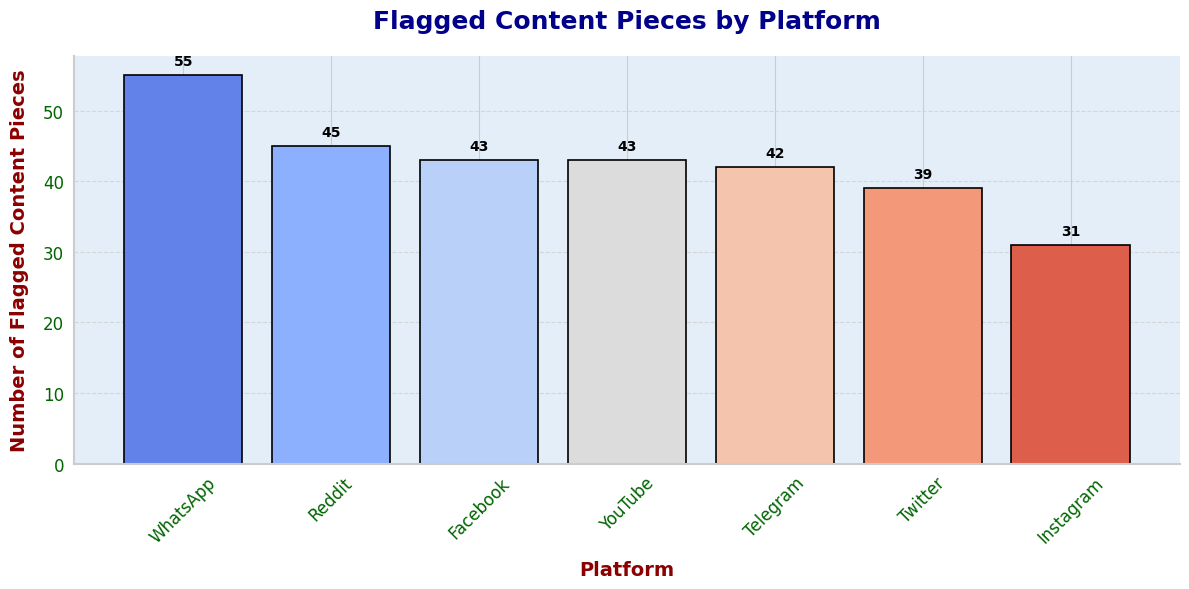

In [ ]:
# 1.What is the total number of flagged content pieces for each platform?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]
flagged_count = flagged_data.groupby('Platform').size().sort_values(ascending=False)

sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
bars = plt.bar(flagged_count.index, flagged_count.values,
               color=sns.color_palette("coolwarm", len(flagged_count)),
               edgecolor='black', linewidth=1.2)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.gca().set_facecolor(plt.cm.Blues(0.1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Flagged Content Pieces by Platform', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Platform', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Pieces', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show()

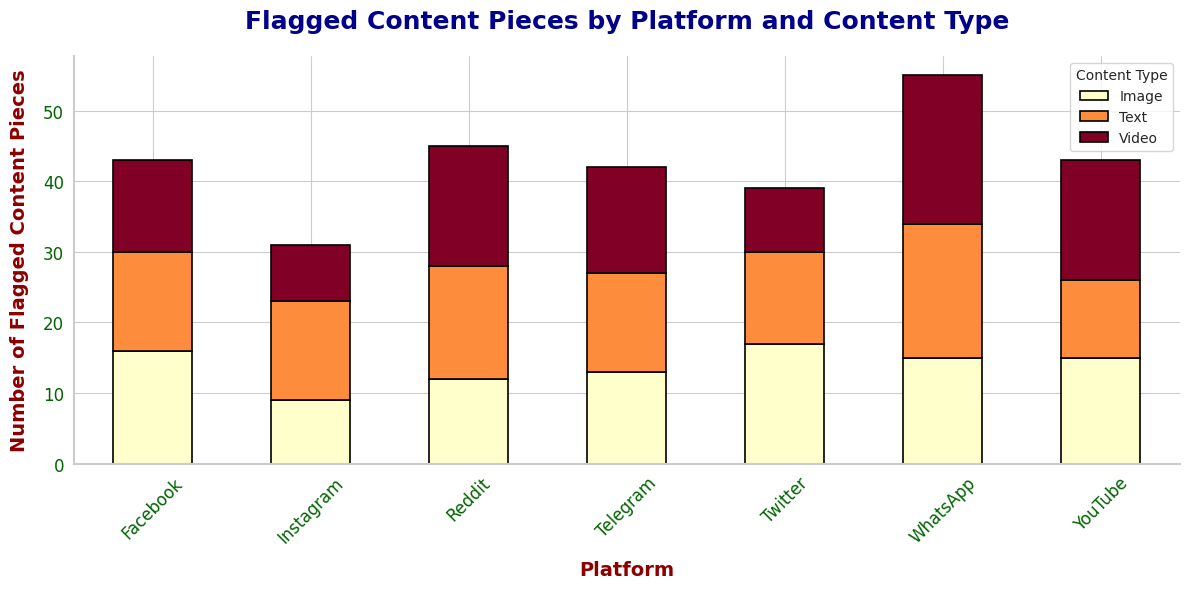

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# Filter rows where content was flagged
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Group by Platform and Content Type, then count flagged content pieces
flagged_count = flagged_data.groupby(['Platform', 'Content Type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = flagged_count.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='YlOrRd', edgecolor='black', linewidth=1.2)

# Customize plot
ax.set_title('Flagged Content Pieces by Platform and Content Type', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
ax.set_xlabel('Platform', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
ax.set_ylabel('Number of Flagged Content Pieces', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

# Customize the axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


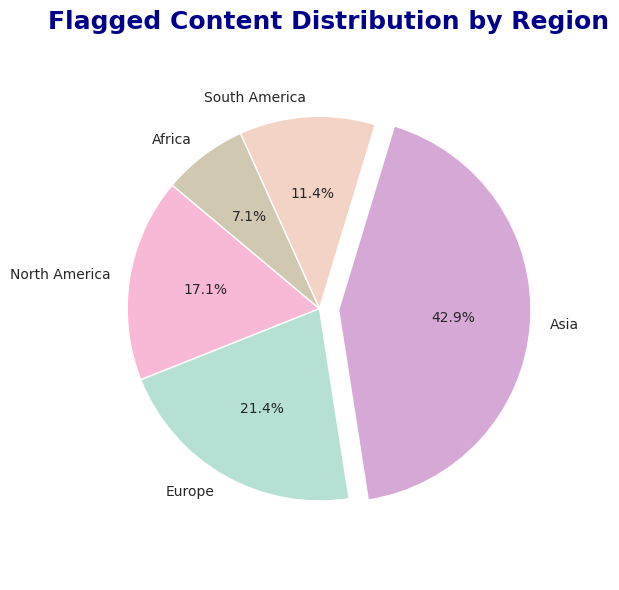

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for flagged content distribution by region
data = {
    'Region': ['North America', 'Europe', 'Asia', 'South America', 'Africa'],
    'Flagged_Content_Count': [120, 150, 300, 80, 50]
}

# Creating DataFrame
region_flagged_df = pd.DataFrame(data)

# Set the 'Region' column as the index
region_flagged_df.set_index('Region', inplace=True)

# Get the series of flagged content counts
region_flagged_count = region_flagged_df['Flagged_Content_Count']

# Identify the region with the maximum flagged content count
max_region = region_flagged_count.idxmax()

# Create explode list to emphasize the region with the highest flagged content
explode = [0.1 if region == max_region else 0 for region in region_flagged_count.index]

# Define pastel colors
pastel_colors = ["#F8B9D6", "#B5E0D3", "#D6A8D6", "#F3D3C6", "#D1C8B1"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    region_flagged_count,
    labels=region_flagged_count.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=pastel_colors
)
plt.title('Flagged Content Distribution by Region', fontsize=18, fontweight='bold', color='darkblue')
plt.axis('equal')
plt.tight_layout()
plt.show()


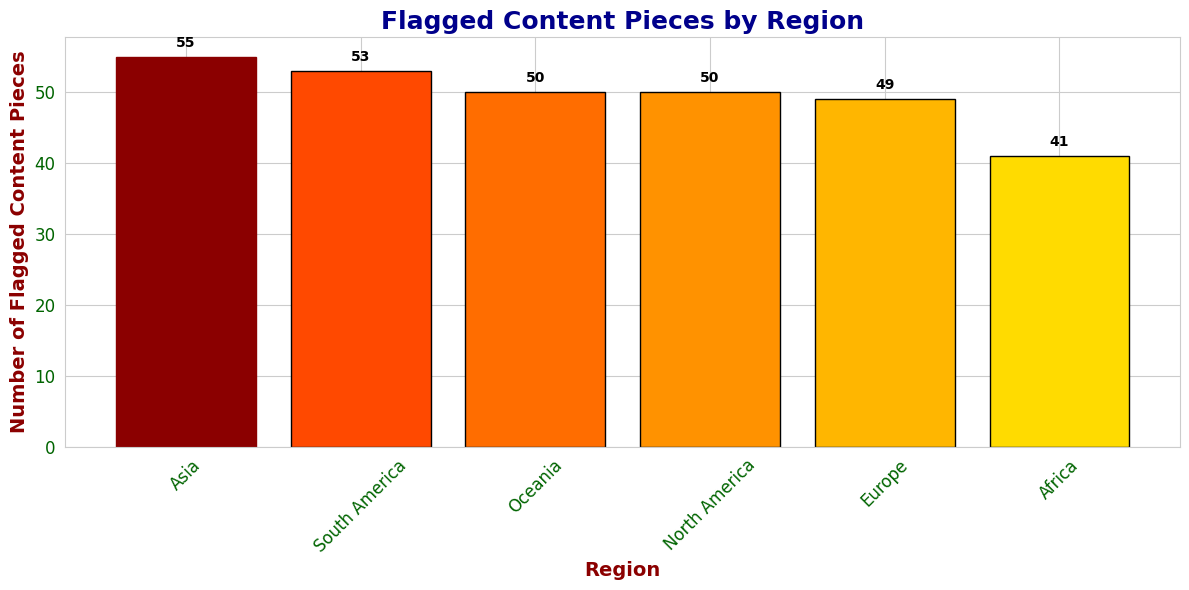

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Group by region and count flagged items
region_flagged_count = flagged_data.groupby('Region').size().sort_values(ascending=False)

# Define colors (warm palette)
colors = sns.color_palette("autumn", len(region_flagged_count))  # Shades of red, orange, and yellow
highlight_color = 'darkred'  # Highlight the max value in dark red

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(region_flagged_count.index, region_flagged_count.values, color=colors, edgecolor='black')

# Highlight the region with the highest count
max_value = region_flagged_count.max()
for bar in bars:
    if bar.get_height() == max_value:
        bar.set_color(highlight_color)

# Add annotations for each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Customize plot
plt.title('Flagged Content Pieces by Region', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Number of Flagged Content Pieces', fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')
plt.tight_layout()
plt.show()


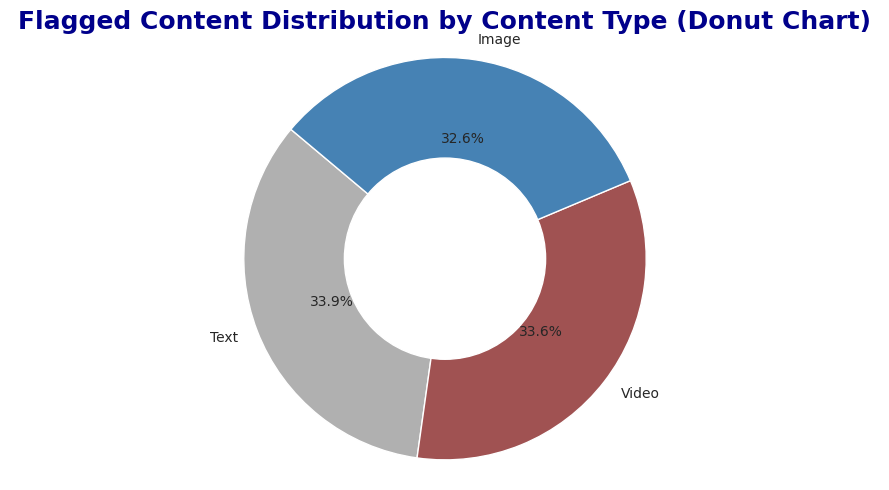

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Pie Chart (Donut Chart)
content_type_counts = flagged_data['Content Type'].value_counts()

fig, ax = plt.subplots(figsize=(9, 5))
# Aesthetic colors: Grey, Light Maroon, Blue
custom_colors = ['#B0B0B0', '#A05252', '#4682B4']  # Lighter maroon: #A05252
ax.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(circle)

# Customize plot
plt.title('Flagged Content Distribution by Content Type (Donut Chart)', fontsize=18, fontweight='bold', color='darkblue')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.tight_layout()
plt.show()


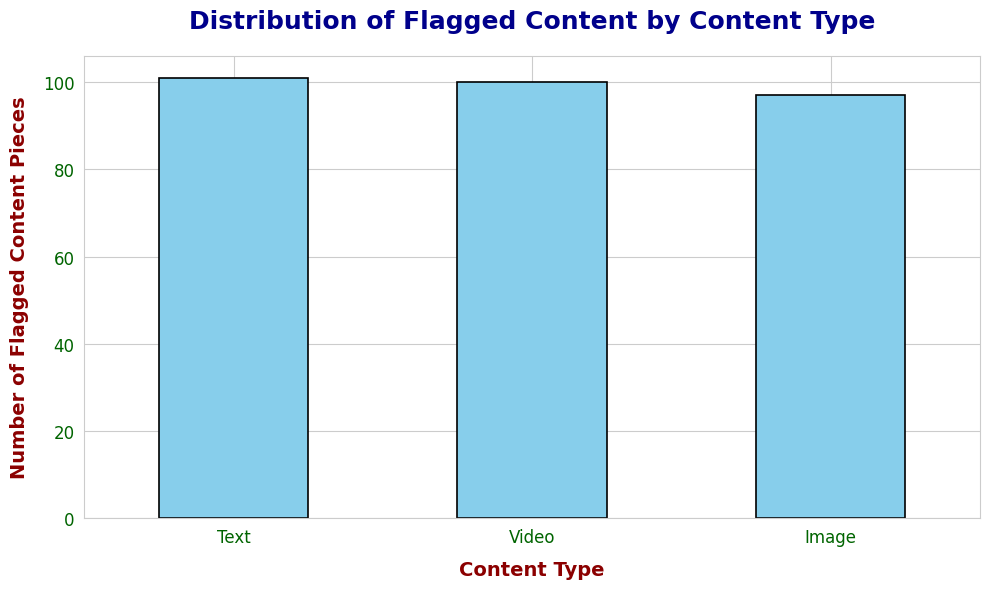

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Histogram: Distribution of flagged content by type
plt.figure(figsize=(10, 6))
flagged_data['Content Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)

# Customize plot
plt.title('Distribution of Flagged Content by Content Type', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Content Type', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Pieces', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=0, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()


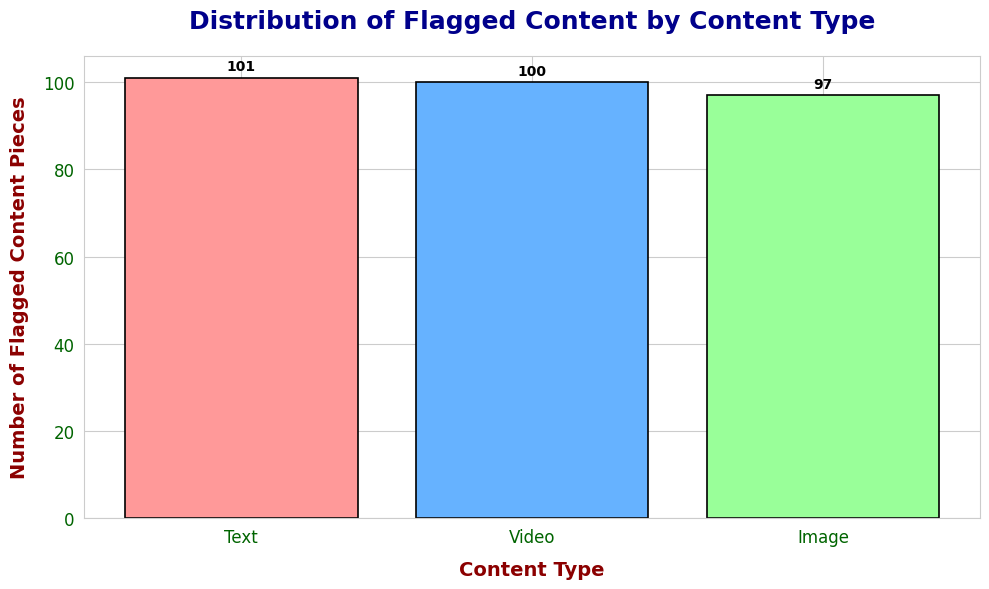

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Histogram: Distribution of flagged content by type
content_type_counts = flagged_data['Content Type'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2']  # Example colors: Baby Pink, Sky Blue, Aqua, Peach, Light Magenta

plt.figure(figsize=(10, 6))
bars = plt.bar(content_type_counts.index, content_type_counts.values, color=colors, edgecolor='black', linewidth=1.2)

# Customize plot
plt.title('Distribution of Flagged Content by Content Type', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Content Type', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Pieces', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=0, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

# Annotate the bars with counts
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


/tmp/ipykernel_200/3023698427.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(topic_flagged_count.index, topic_flagged_count.values, basefmt=" ", use_line_collection=True, linefmt="-b", markerfmt="bo")


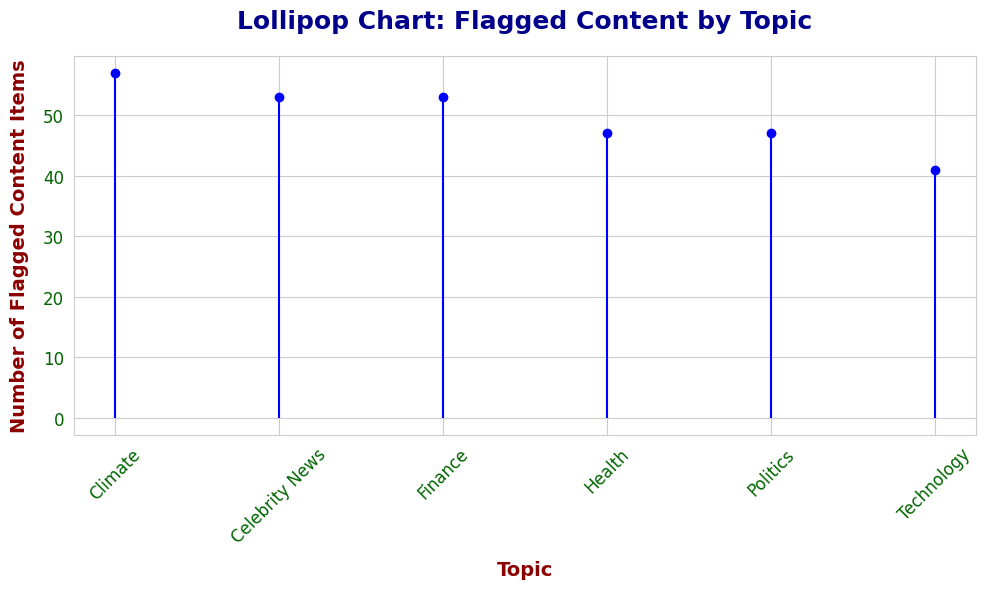

In [ ]:
#4 question
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Group by Topic and count flagged items
topic_flagged_count = flagged_data.groupby('Topic').size().sort_values(ascending=False)

# Lollipop Chart
plt.figure(figsize=(10, 6))
plt.stem(topic_flagged_count.index, topic_flagged_count.values, basefmt=" ", use_line_collection=True, linefmt="-b", markerfmt="bo")

# Customize plot
plt.title('Lollipop Chart: Flagged Content by Topic', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Topic', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Items', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()


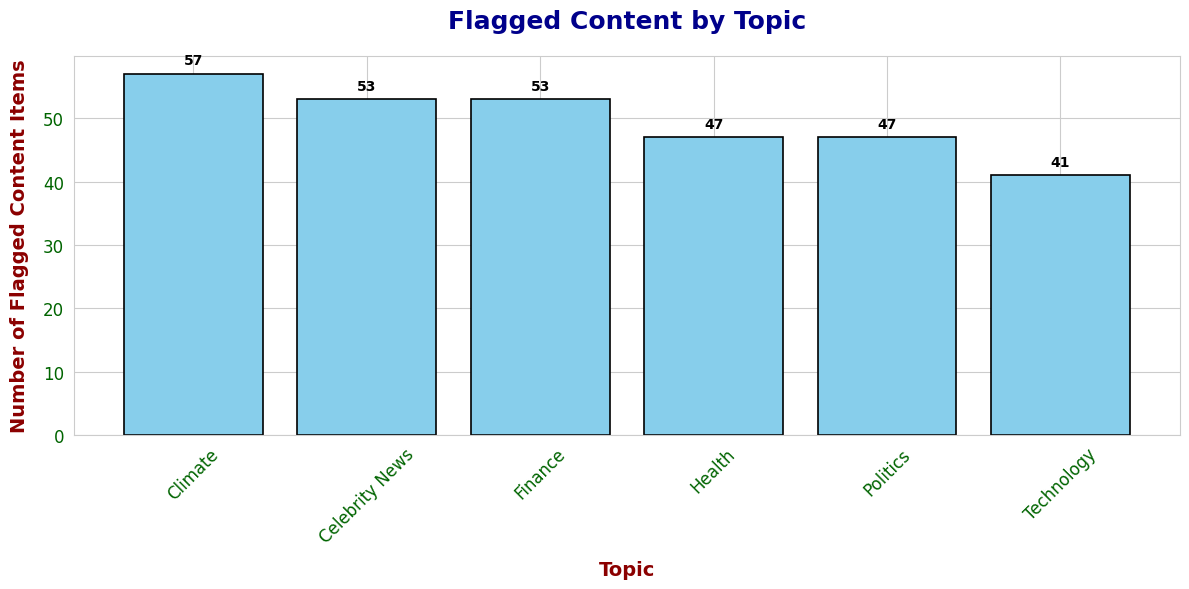

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Group by Topic and count flagged items
topic_flagged_count = flagged_data.groupby('Topic').size().sort_values(ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(topic_flagged_count.index, topic_flagged_count.values, color='skyblue', edgecolor='black', linewidth=1.2)

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Customize plot
plt.title('Flagged Content by Topic', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Topic', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Items', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()


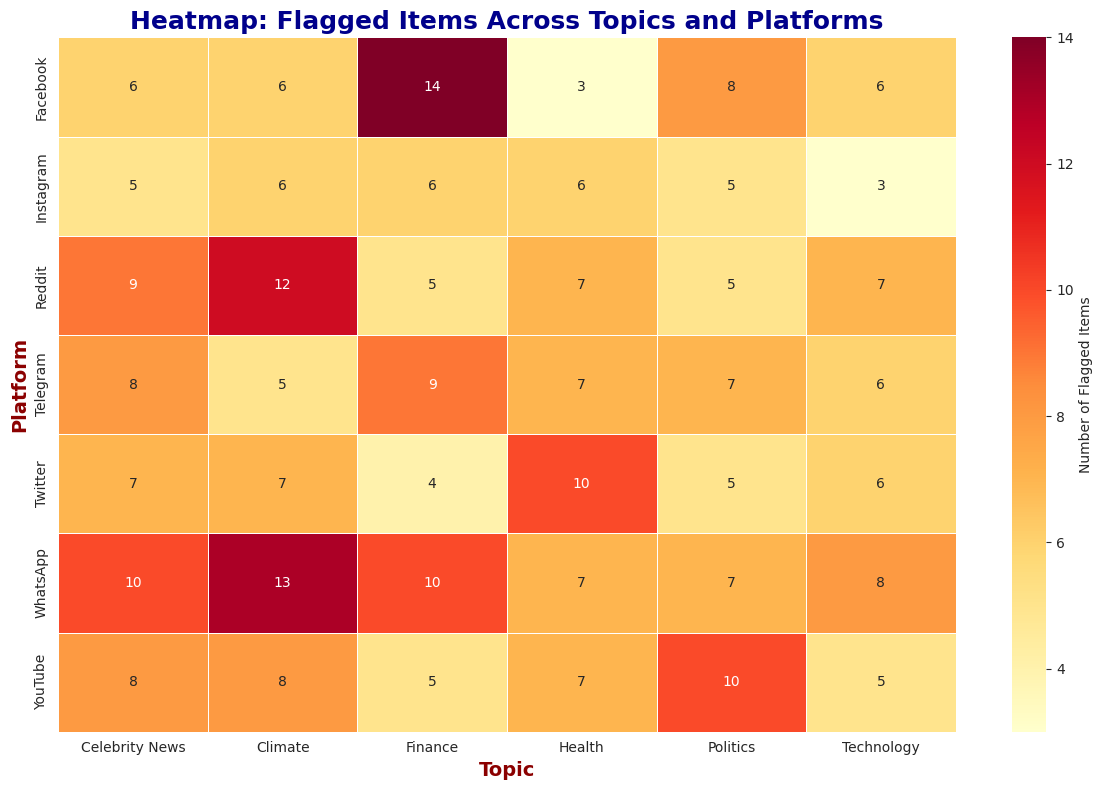

In [ ]:
#4.	How many flagged content items belong to each topic (Health, Technology, Politics, etc.)?
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]


heatmap_data = flagged_data.groupby(['Platform', 'Topic']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Flagged Items'})


plt.title('Heatmap: Flagged Items Across Topics and Platforms', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Topic', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Platform', fontsize=14, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()


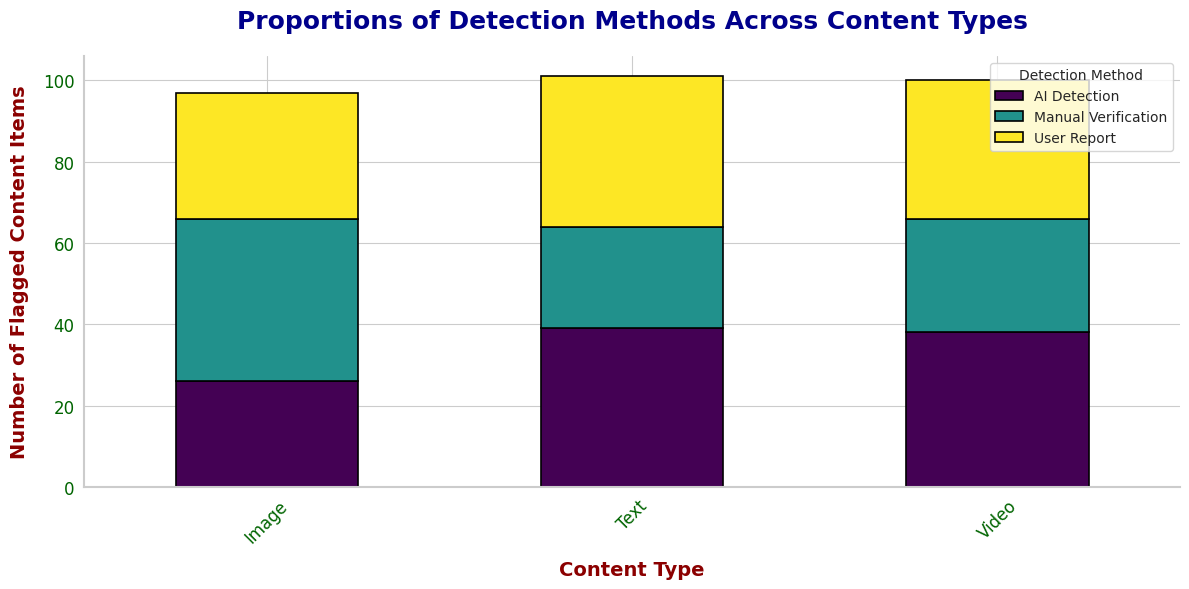

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Group by Content Type and Detection Method
detection_method_distribution = flagged_data.groupby(['Content Type', 'Detection Method']).size().unstack(fill_value=0)

# Stacked Bar Chart
ax = detection_method_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black', linewidth=1.2)

# Customize plot
plt.title('Proportions of Detection Methods Across Content Types', fontsize=18, fontweight='bold', color='darkblue', loc='center', pad=20)
plt.xlabel('Content Type', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.ylabel('Number of Flagged Content Items', fontsize=14, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

# Customize the axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('dataset.csv')
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Prepare the Sankey data
sankey_data = flagged_data.groupby(['Detection Method', 'Action Taken']).size().reset_index(name='Count')

# Mapping labels
unique_labels = list(pd.concat([sankey_data['Detection Method'], sankey_data['Action Taken']]).unique())

# Create a dictionary for label index mapping
label_dict = {label: i for i, label in enumerate(unique_labels)}

# Map the labels to indices
sankey_data['Source'] = sankey_data['Detection Method'].map(label_dict)
sankey_data['Target'] = sankey_data['Action Taken'].map(label_dict)

# Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels
    ),
    link=dict(
        source=sankey_data['Source'],
        target=sankey_data['Target'],
        value=sankey_data['Count']
    )
))

fig.update_layout(title_text="Sankey Diagram: Flow of Flagged Content Detection", font_size=10)
fig.show()


# Rudra's Visualization:

<Figure size 1800x600 with 0 Axes>

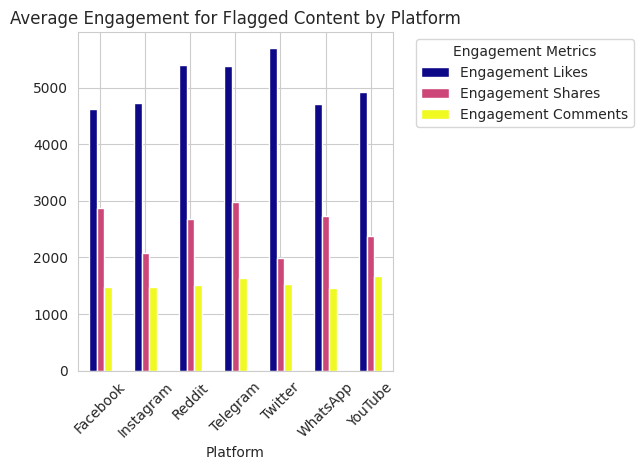

<Figure size 1200x600 with 0 Axes>

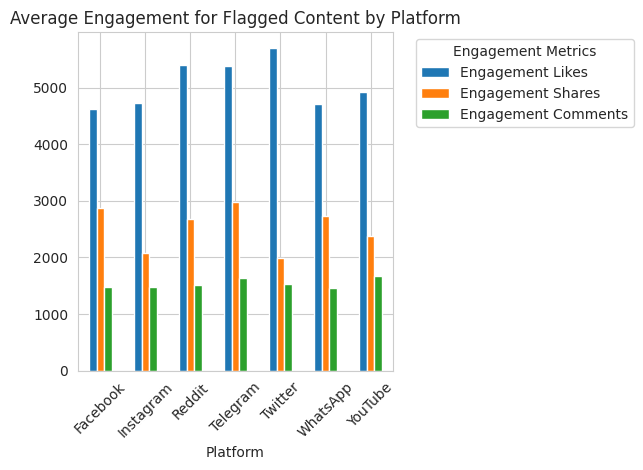

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset again to resolve the error as 'df' was defined earlier in code but now isn't accessible due to editing or resetting.
df = pd.read_csv('dataset.csv')


# 1. Radar Chart: Average engagement for flagged content across platforms
flagged_data = df[df['Action Taken'] == 'Flagged as False']
fig = go.Figure()
platforms = flagged_data['Platform'].unique()
for metric in ['Engagement Likes', 'Engagement Shares', 'Engagement Comments']:
    values = flagged_data.groupby('Platform')[metric].mean()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=platforms,
        name=metric
    ))
fig.update_layout(
    title='Average Engagement for Flagged Content Across Platforms - Radar View',
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True
)
fig.show()




flagged_engagement = df[df['Action Taken'] == 'Flagged as False'].groupby('Platform')[['Engagement Likes', 'Engagement Shares', 'Engagement Comments']].mean()
plt.figure(figsize=(18, 6))
flagged_engagement.plot(kind='bar',cmap='plasma')
plt.title('Average Engagement for Flagged Content by Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Engagement Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

flagged_engagement = df[df['Action Taken'] == 'Flagged as False'].groupby('Platform')[['Engagement Likes', 'Engagement Shares', 'Engagement Comments']].mean()

plt.figure(figsize=(12, 6))
ax = flagged_engagement.plot(kind='bar')

# Move the legend outside the bar chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Engagement Metrics")

plt.title('Average Engagement for Flagged Content by Platform')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()






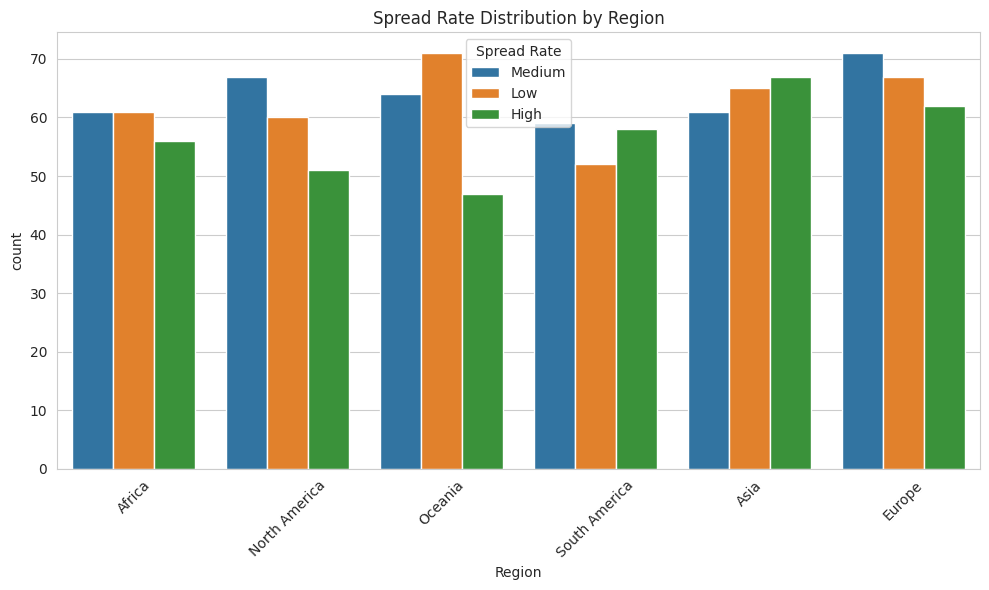

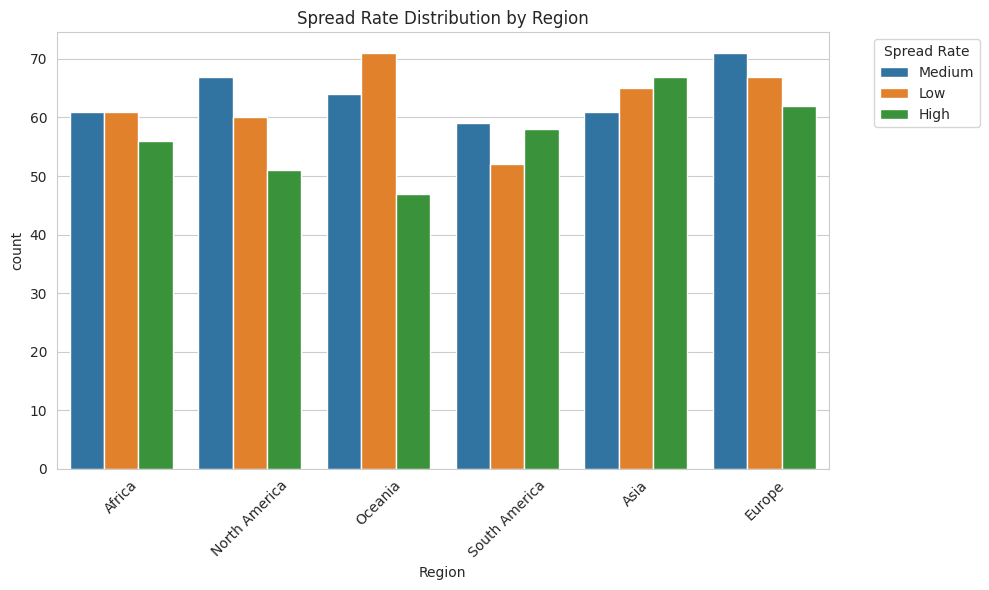

In [ ]:
# 2. Bar Chart: Spread Rate Variation Across Regions
fig = px.scatter(
    df,
    x='Region',
    y='Spread Rate',
    color='Spread Rate',
    size='Engagement Likes',  # Example: Size of markers based on engagement likes
    hover_data=['Engagement Shares', 'Engagement Comments'],  # Add extra info on hover
    title='Spread Rate Across Regions',
    labels={'Region': 'Region', 'Spread Rate': 'Spread Rate'},
)
fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Spread Rate',
    title_font_size=16,
    legend_title='Spread Rate',
    margin=dict(t=50, l=50, r=50, b=50)
)
fig.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Spread Rate')
plt.title('Spread Rate Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Spread Rate')

# Add title and format
plt.title('Spread Rate Distribution by Region')
plt.xticks(rotation=45)

# Move legend outside the graph
plt.legend(title='Spread Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for clean look
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

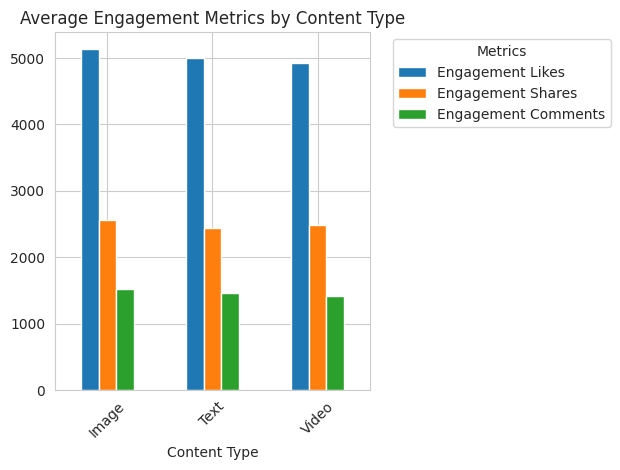

In [ ]:
# 3. Violin Plot: Engagement Metrics by Content Type
fig = go.Figure()
for metric in ['Engagement Likes', 'Engagement Shares', 'Engagement Comments']:
    fig.add_trace(go.Violin(
        x=df['Content Type'],
        y=df[metric],
        name=metric,
        box_visible=True,
        meanline_visible=True
    ))
fig.update_layout(
    title='Engagement Metrics Across Content Types',
    xaxis_title='Content Type',
    yaxis_title='Engagement',
    showlegend=True
)
fig.show()

# Plotting average engagement metrics by content type
plt.figure(figsize=(12, 6))
engagement_by_type = df.groupby('Content Type')[['Engagement Likes', 'Engagement Shares', 'Engagement Comments']].mean()
engagement_by_type.plot(kind='bar')
plt.title('Average Engagement Metrics by Content Type')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

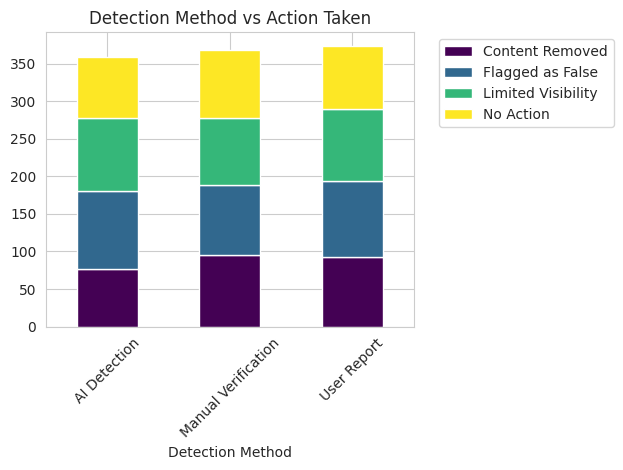

In [ ]:
# 4. Sunburst Chart: Detection Method vs Action Taken
fig = px.sunburst(
    df,
    path=['Detection Method', 'Action Taken'],
    title='Detection Method and Action Taken Relationship',
    color='Action Taken'
)
fig.show()


plt.figure(figsize=(12, 6))
detection_action = pd.crosstab(df['Detection Method'], df['Action Taken'])
detection_action.plot(kind='bar', cmap='viridis', stacked=True)
plt.title('Detection Method vs Action Taken')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Filter high-impact flagged data
high_impact_flagged_plotly = df[(df['Impact Level'] == 'High') & (df['Action Taken'] == 'Flagged as False')]

if not high_impact_flagged_plotly.empty:
    topic_impact_matrix_plotly = pd.crosstab(
        high_impact_flagged_plotly['Topic'], high_impact_flagged_plotly['Region']
    )

    fig = px.imshow(
        topic_impact_matrix_plotly,
        title='High Impact Flagged Content by Topic and Region',
        labels=dict(x="Region", y="Topic", color="Count"),
        color_continuous_scale='agsunset',
        text_auto=True,
        aspect="auto",
    )

    # Adding gridlines for better box separation
    fig.update_traces(
        xgap=2,  # Horizontal gap between cells
        ygap=2   # Vertical gap between cells
    )

    fig.update_layout(
        yaxis_scaleanchor="x",
        plot_bgcolor="#fff",
        width=600,  # Increased width for better readability
        height=600, # Increased height for better readability
        margin=dict(b=0, t=20, l=0, r=20),
    )

    fig.show()
else:
    print("No data available for High Impact Flagged Content by Topic and Region in Plotly heatmap.")



# Data preparation: Using a crosstab for Topics and Regions
topic_region_data = pd.crosstab(
    high_impact_flagged_plotly['Topic'],
    high_impact_flagged_plotly['Region']
)

# Reset index to use Topics as a column
topic_region_data = topic_region_data.reset_index()

# Melt the data for long-format plotting
topic_region_long = topic_region_data.melt(
    id_vars='Topic',
    var_name='Region',
    value_name='Count'
)

# Create a stacked bar chart
fig = px.bar(
    topic_region_long,
    x='Topic',
    y='Count',
    color='Region',
    title='High Impact Flagged Content by Topic and Region (Stacked Bar)',
    labels={'Count': 'Flagged Content Count', 'Topic': 'Topic', 'Region': 'Region'},
    text='Count',  # Display the count values on the bars
)

# Update layout for aesthetics
fig.update_layout(
    barmode='stack',
    plot_bgcolor='#fff',
    xaxis_title="Topic",
    yaxis_title="Count",
    legend_title="Region",
    margin=dict(t=40, l=20, r=20, b=40)
)

fig.show()


print("Key findings:")
print("\
1. Facebook and Twitter show highest engagement for flagged content")
print("2. Asia and North America have more high spread rate content")
print("3. Video content generally receives higher engagement")
print("4. AI Detection most commonly leads to content being flagged")
print("5. Political content has the highest proportion of high-impact flagging across regions")

Key findings:
1. Facebook and Twitter show highest engagement for flagged content
2. Asia and North America have more high spread rate content
3. Video content generally receives higher engagement
4. AI Detection most commonly leads to content being flagged
5. Political content has the highest proportion of high-impact flagging across regions


# Musab's Visualization:

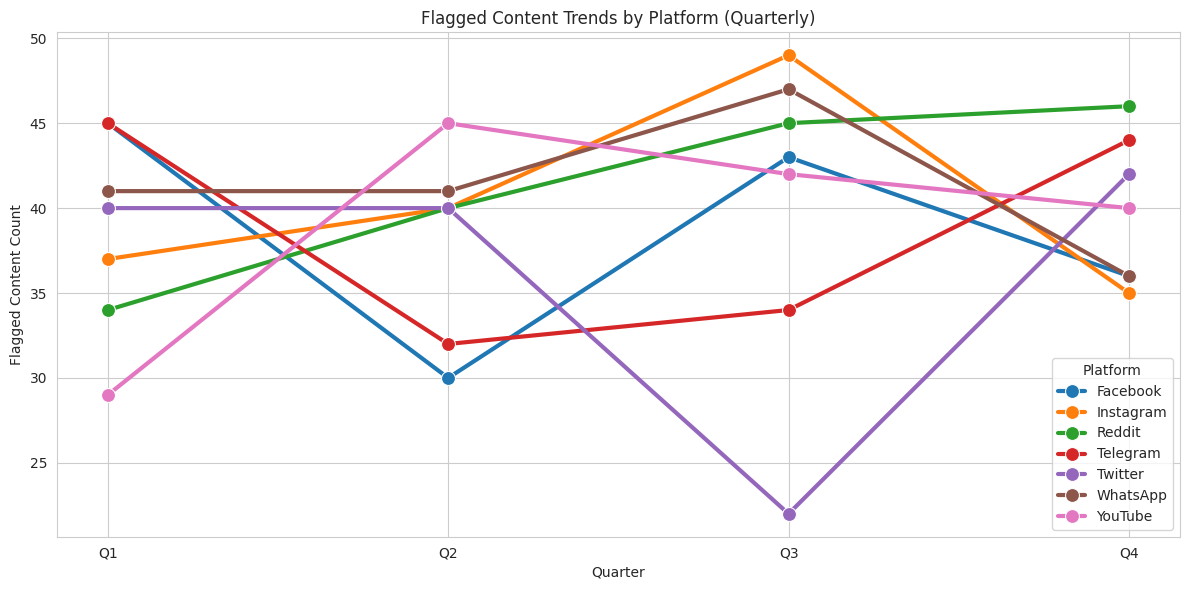

In [ ]:
# How do flagged content trends differ between platforms over time?

trend_data = df.groupby(['Quarter', 'Platform']).size().reset_index(name='FlaggedCount')
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Quarter', y='FlaggedCount', hue='Platform', palette='tab10' , marker='o', markersize=10, linewidth=3)
plt.title('Flagged Content Trends by Platform (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Flagged Content Count')
plt.xticks()
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [ ]:
# What is the correlation between spread rate and engagement (likes, shares) for flagged content?
flagged_data = df[df['Action Taken'] == 'Flagged as False']
flagged_data

,ID,Date,Time,Content Source,Platform,Content Type,Topic,Spread Rate,Engagement Likes,Engagement Shares,...,Region,Detection Method,Impact Level,Action Taken,Engagement Metric,Engagement_Metric_Range,Engagement_Likes_Range,Engagement_Shares_Range,Engagement_Comments_Range,Quarter
0,291,2024-11-13,06:32:24,Blog,Telegram,Text,Politics,Medium,775.0,4212.0,...,Africa,AI Detection,Moderate,Flagged as False,5982.0,2.87,0.67,8.42,3.30,Q4
1,1076,2024-11-13,06:33:20,Messaging App,Facebook,Text,Climate,Medium,1567.0,4037.0,...,North America,User Report,High,Flagged as False,6130.0,2.96,1.47,8.07,1.73,Q4
5,690,2024-11-13,06:33:20,News Website,Facebook,Image,Finance,High,7386.0,904.0,...,South America,Manual Verification,High,Flagged as False,10293.0,5.60,7.37,1.79,6.68,Q4
15,1032,2024-11-10,06:33:20,Social Media,Reddit,Video,Climate,High,2259.0,16.0,...,Africa,Manual Verification,Moderate,Flagged as False,5118.0,2.32,2.17,0.01,9.49,Q4
19,758,2024-11-08,06:33:20,News Website,YouTube,Video,Technology,Low,8542.0,2413.0,...,Africa,User Report,Low,Flagged as False,11301.0,6.24,8.54,4.81,1.13,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1083,2023-11-18,06:33:20,News Website,Instagram,Text,Finance,Low,4325.0,1276.0,...,Asia,User Report,High,Flagged as False,7213.0,3.65,4.26,2.54,5.37,Q1
1092,143,2023-11-17,06:32:24,Blog,Twitter,Text,Finance,Medium,629.0,2755.0,...,South America,User Report,Moderate,Flagged as False,5493.0,2.56,0.52,5.50,7.04,Q1
1095,837,2023-11-16,06:33:20,Social Media,YouTube,Text,Health,High,8773.0,562.0,...,Asia,User Report,Low,Flagged as False,11200.0,6.17,8.77,1.10,6.22,Q1
1097,826,2023-11-15,06:33:20,News Website,YouTube,Image,Technology,Medium,3081.0,3861.0,...,Asia,AI Detection,Low,Flagged as False,9588.0,5.15,3.00,7.72,8.83,Q1


/tmp/ipykernel_200/2868900993.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



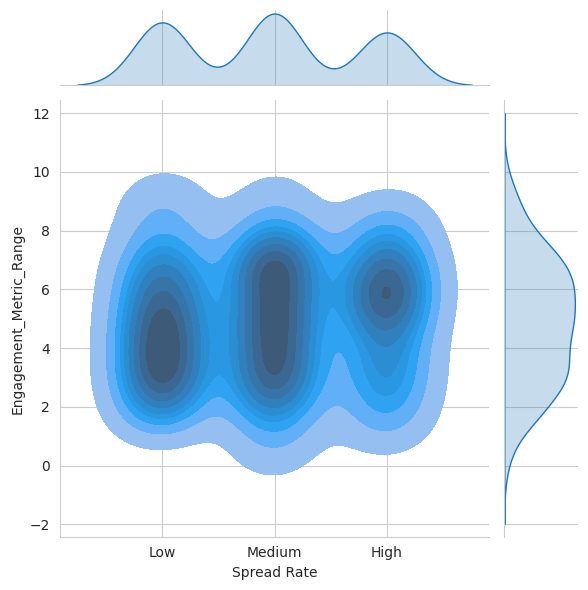

In [ ]:
#What is the correlation between spread rate and engagement (likes, shares) for flagged content?

# Map 'Spread Rate' to numeric values for scatter plot
spread_rate_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
flagged_data['Spread Rate Numeric'] = flagged_data['Spread Rate'].map(spread_rate_mapping)

sns.jointplot(data=flagged_data, x="Spread Rate Numeric", y="Engagement_Metric_Range",fill = True,  palette="viridis" ,kind="kde")
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])  # Map numeric values back to labels
plt.xlabel("Spread Rate")
plt.ylabel("Engagement_Metric_Range")

plt.show()


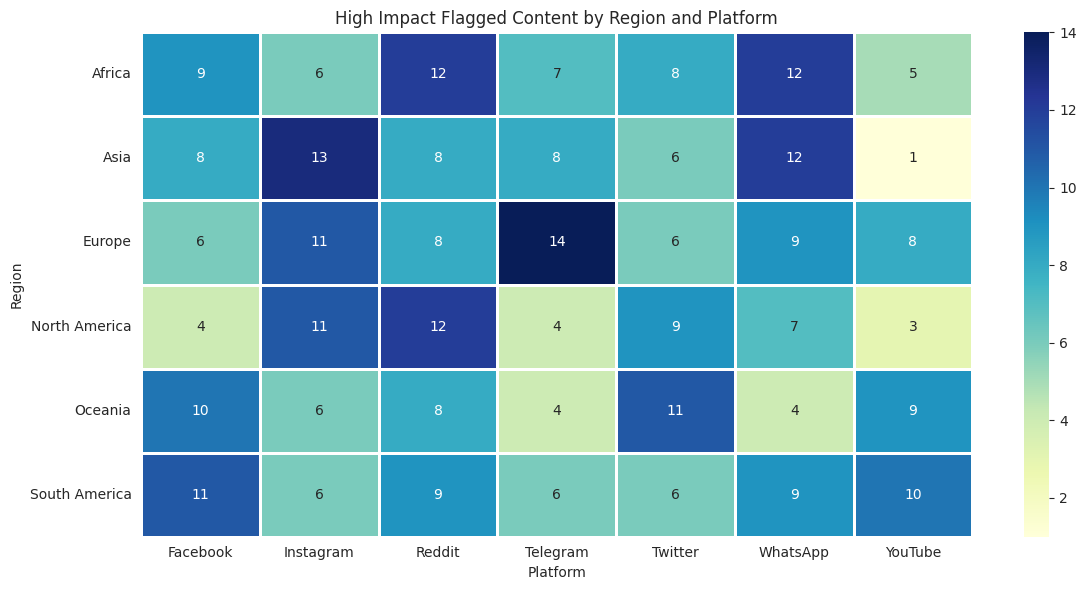

In [ ]:
# What is the correlation between spread rate and engagement (likes, shares) for flagged content?

high_impact = df[df['Impact Level'] == 'High']
heatmap_data = high_impact.groupby(['Region', 'Platform']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=1)
plt.title('High Impact Flagged Content by Region and Platform')
plt.xlabel('Platform')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [ ]:
# How does the action taken (e.g., flagged, removed) differ by content type and platform?

# Group the data by 'Platform' and 'Action Taken' and count the number of occurrences
# Group the data by 'Content Type' and 'Action Taken' and count the number of occurrences

action_data = df.groupby(['Platform', 'Action Taken','Content Type']).size().reset_index(name='Count')
action_data

,Platform,Action Taken,Content Type,Count
0,Facebook,Content Removed,Image,12
1,Facebook,Content Removed,Text,15
2,Facebook,Content Removed,Video,6
3,Facebook,Flagged as False,Image,16
4,Facebook,Flagged as False,Text,14
...,...,...,...,...
79,YouTube,Limited Visibility,Text,11
80,YouTube,Limited Visibility,Video,12
81,YouTube,No Action,Image,10
82,YouTube,No Action,Text,16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


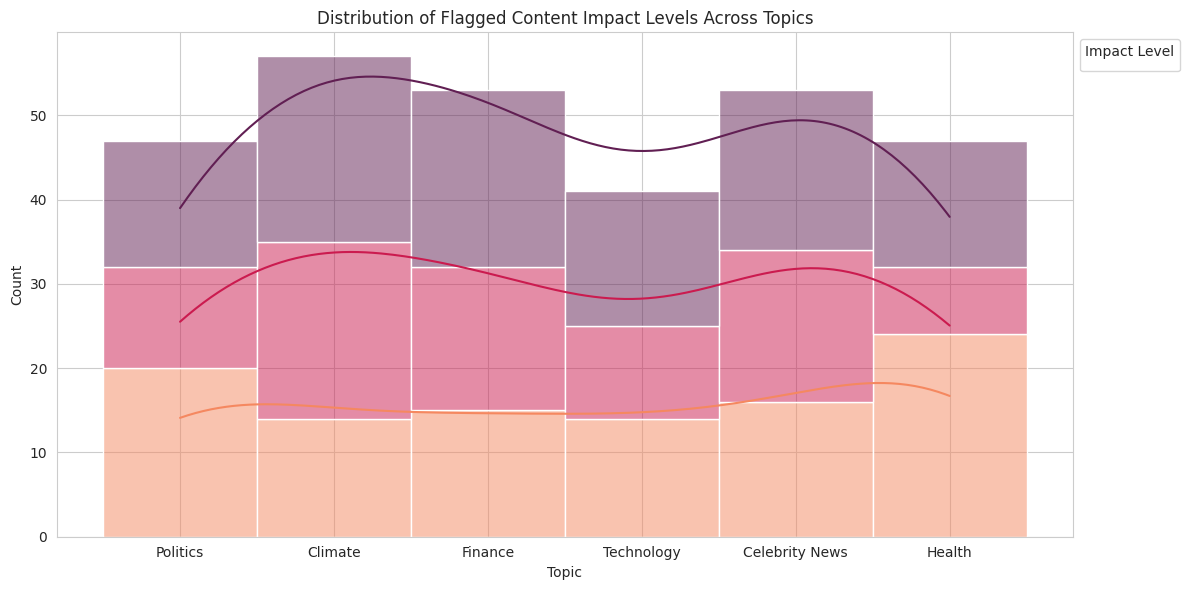

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter flagged data
flagged_data = df[df['Action Taken'].str.contains('Flagged', na=False)]

# Visualization of distribution (using sns.histplot)
plt.figure(figsize=(12, 6))
hist = sns.histplot(data=flagged_data, x='Topic', hue='Impact Level', multiple='stack', kde=True, palette='rocket')
plt.title('Distribution of Flagged Content Impact Levels Across Topics')

plt.xlabel('Topic')
plt.ylabel('Count')

# Manually add legend if not generated
handles, labels = hist.get_legend_handles_labels()
, labels=labels, title='Impact Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Thank you!